# Analyzing Life Expectancy


### Problem Statement 
The objective of this project is to perform an analysis on the Life Expectancy dataset from the World Health Organization (WHO). It contains various metrics of a country over 14 years, including life expectancy.

At the end of this notebook, the goal is to determine and predict the life expectancy of a country based on the other provided metrics, as well as to identify which ones have the greatest impact on life expectancy.

# Importing libraries

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pt
import plotly.express as px
import plotly.express as plt
import pycountry
from sklearn.linear_model import LinearRegression
import sklearn
import sklearn.metrics as sm
import math
import plotly.graph_objects as go
#General
import warnings
warnings.filterwarnings(action='ignore')

# Loading the data


In [45]:
data=pd.read_csv("Life Expectancy Data.csv")

In [46]:
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# columns description

In [47]:
#Check that the columns description match the data format.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# Checking Missing Values

In [48]:
# Checking if there are still null values or not in the dataframe accept column "OCCUPATION_TYPE"
(data.isnull().sum()/len(data)*100).sort_values(ascending=False)

Population                         22.191967
Hepatitis B                        18.822328
GDP                                15.248468
Total expenditure                   7.692308
Alcohol                             6.603131
Income composition of resources     5.684139
Schooling                           5.547992
 thinness 5-9 years                 1.157250
 thinness  1-19 years               1.157250
 BMI                                1.157250
Polio                               0.646698
Diphtheria                          0.646698
Life expectancy                     0.340368
Adult Mortality                     0.340368
 HIV/AIDS                           0.000000
Country                             0.000000
Year                                0.000000
Measles                             0.000000
percentage expenditure              0.000000
infant deaths                       0.000000
Status                              0.000000
under-five deaths                   0.000000
dtype: flo

# Filling the missing values with mean

In [49]:
data[['Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Diphtheria ',' HIV/AIDS',
     'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Life expectancy ', 'Total expenditure', 
     'Income composition of resources', 'Schooling', 'GDP']] = data[['Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Diphtheria ', ' HIV/AIDS',
     'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Life expectancy ', 'Total expenditure', 
     'Income composition of resources', 'Schooling', 'GDP']].transform(lambda x: x.fillna(x.mean()))

In [50]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [51]:
data.shape

(2938, 22)

## Detecting And Removing Outliers 

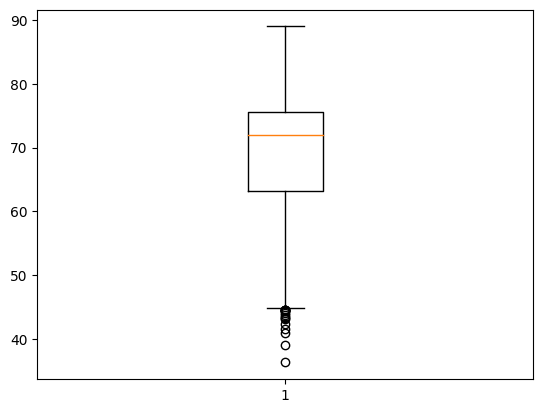

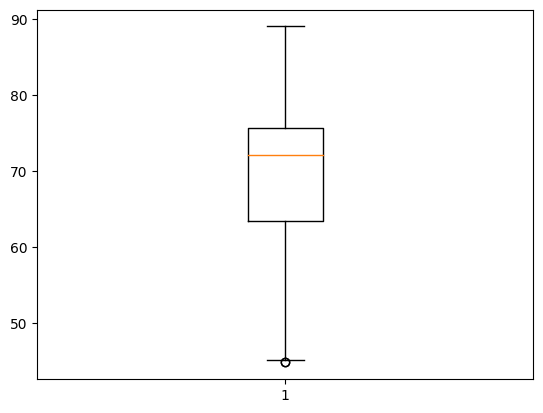

In [52]:

import matplotlib.pyplot as plt
import numpy as np

plt.boxplot(data['Life expectancy '])
plt.show()

q1, q3 = np.percentile(data['Life expectancy '], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = data['Life expectancy '][(data['Life expectancy '] < lower_bound) | (data['Life expectancy '] > upper_bound)]

# remove outliers from the data
data1 = data['Life expectancy '][(data['Life expectancy '] >= lower_bound) & (data['Life expectancy '] <= upper_bound)]
data['Life expectancy '] = data1
# plt.figure()
plt.boxplot(data1)
plt.show()

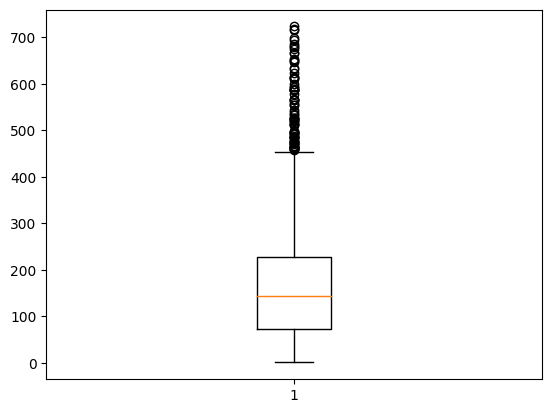

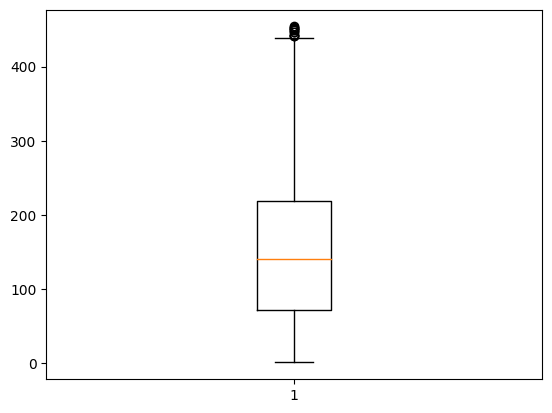

In [53]:
plt.boxplot(data['Adult Mortality'])
plt.show()

q1, q3 = np.percentile(data['Adult Mortality'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = data['Adult Mortality'][(data['Adult Mortality'] < lower_bound) | (data['Adult Mortality'] > upper_bound)]

# remove outliers from the data
data1 = data['Adult Mortality'][(data['Adult Mortality'] >= lower_bound) & (data['Adult Mortality'] <= upper_bound)]
data['Adult Mortality']= data1
# plt.figure()
plt.boxplot(data1)
plt.show()

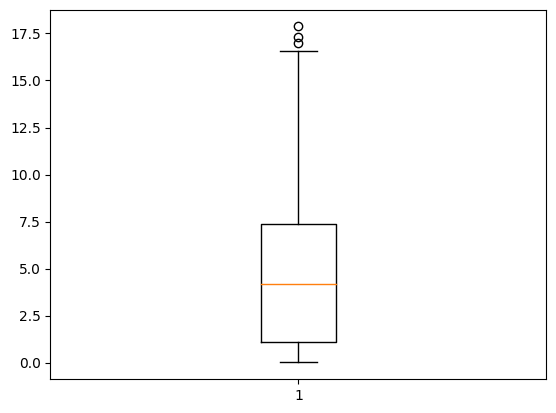

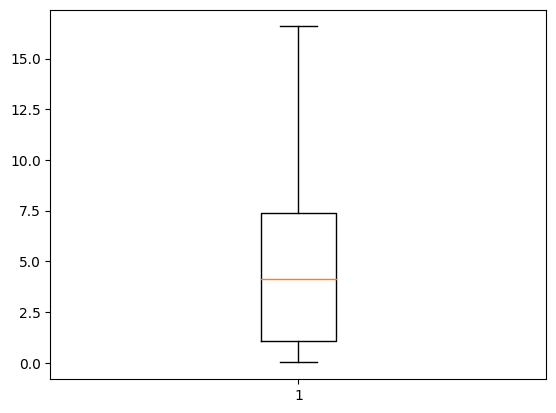

In [54]:
plt.boxplot(data['Alcohol'])
plt.show()

q1, q3 = np.percentile(data['Alcohol'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = data['Alcohol'][(data['Alcohol'] < lower_bound) | (data['Alcohol'] > upper_bound)]

# remove outliers from the data
data1 = data['Alcohol'][(data['Alcohol'] >= lower_bound) & (data['Alcohol'] <= upper_bound)]
data['Alcohol']= data1
# plt.figure()
plt.boxplot(data1)
plt.show()

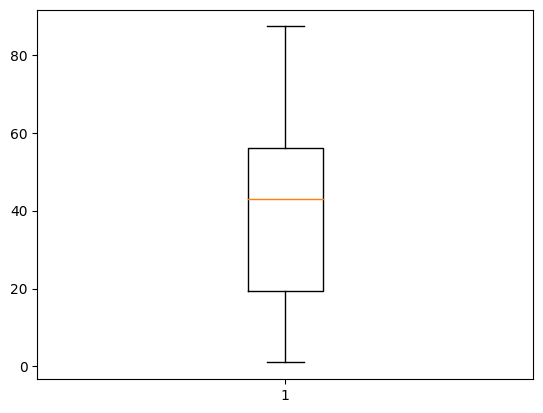

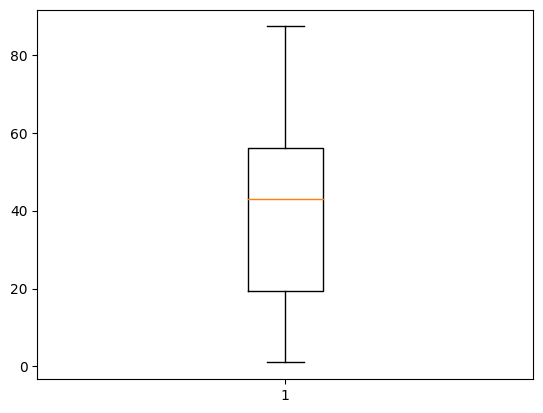

In [55]:
plt.boxplot(data[' BMI '])
plt.show()

q1, q3 = np.percentile(data[' BMI '], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = data[' BMI '][(data[' BMI '] < lower_bound) | (data[' BMI '] > upper_bound)]

# remove outliers from the data
data1 = data[' BMI '][(data[' BMI '] >= lower_bound) & (data[' BMI '] <= upper_bound)]
data[' BMI ']= data1
# plt.figure()
plt.boxplot(data1)
plt.show()

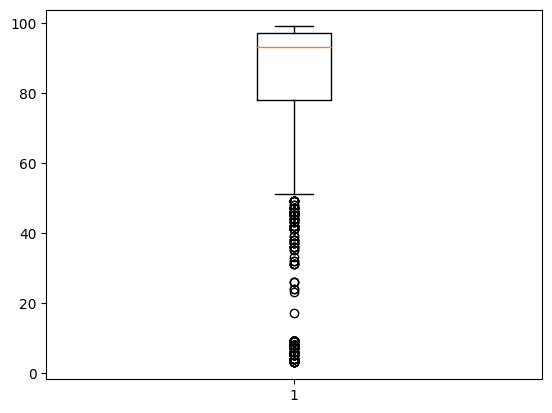

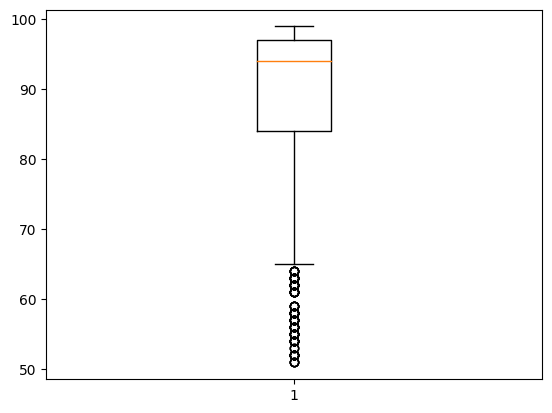

In [56]:
plt.boxplot(data['Polio'])
plt.show()

q1, q3 = np.percentile(data['Polio'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = data['Polio'][(data['Polio'] < lower_bound) | (data['Polio'] > upper_bound)]

# remove outliers from the data
data1 = data['Polio'][(data['Polio'] >= lower_bound) & (data['Polio'] <= upper_bound)]
data['Polio']= data1
# plt.figure()
plt.boxplot(data1)
plt.show()

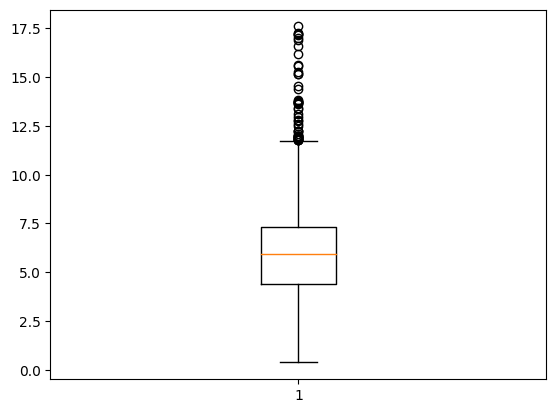

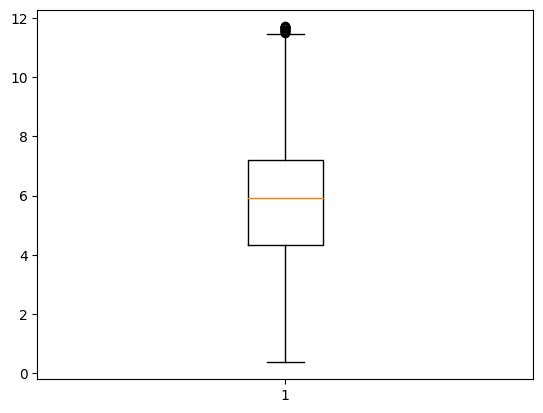

In [57]:
plt.boxplot(data['Total expenditure'])
plt.show()

q1, q3 = np.percentile(data['Total expenditure'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = data['Total expenditure'][(data['Total expenditure'] < lower_bound) | (data['Total expenditure'] > upper_bound)]

# remove outliers from the data
data1 = data['Total expenditure'][(data['Total expenditure'] >= lower_bound) & (data['Total expenditure'] <= upper_bound)]
data['Total expenditure']= data1
# plt.figure()
plt.boxplot(data1)
plt.show()


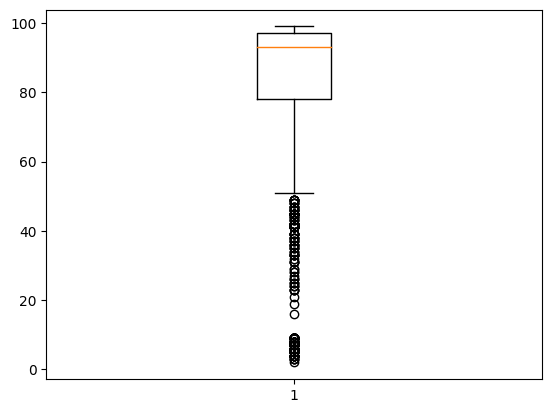

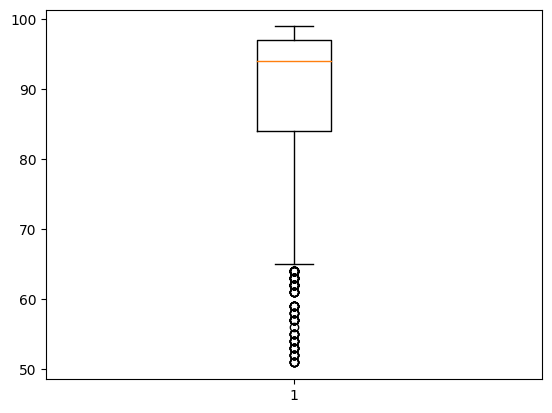

In [58]:
plt.boxplot(data['Diphtheria '])
plt.show()

q1, q3 = np.percentile(data['Diphtheria '], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = data['Diphtheria '][(data['Diphtheria '] < lower_bound) | (data['Diphtheria '] > upper_bound)]

# remove outliers from the data
data1 = data['Diphtheria '][(data['Diphtheria '] >= lower_bound) & (data['Diphtheria '] <= upper_bound)]
data['Diphtheria ']= data1
# plt.figure()
plt.boxplot(data1)
plt.show()

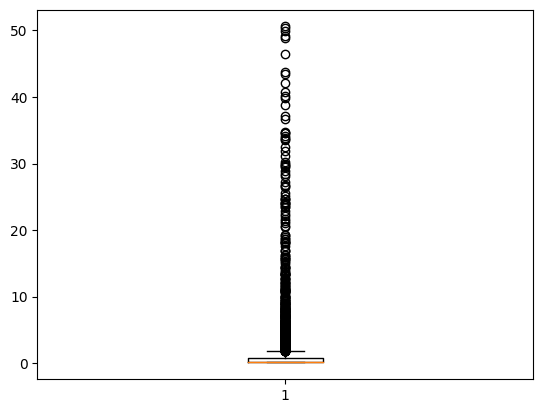

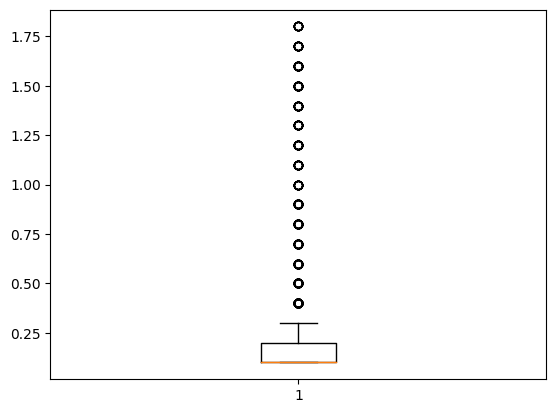

In [59]:
plt.boxplot(data[' HIV/AIDS'])
plt.show()

q1, q3 = np.percentile(data[' HIV/AIDS'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = data[' HIV/AIDS'][(data[' HIV/AIDS'] < lower_bound) | (data[' HIV/AIDS'] > upper_bound)]

# remove outliers from the data
data1 = data[' HIV/AIDS'][(data[' HIV/AIDS'] >= lower_bound) & (data[' HIV/AIDS'] <= upper_bound)]
data[' HIV/AIDS']= data1
# plt.figure()
plt.boxplot(data1)
plt.show()

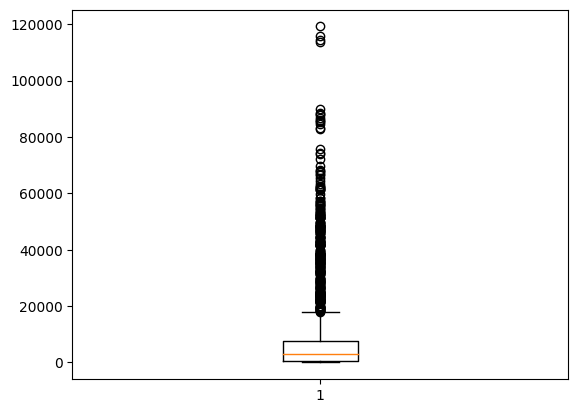

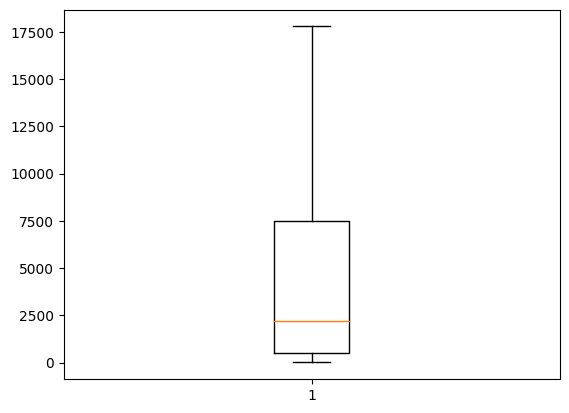

In [60]:
plt.boxplot(data['GDP'])
plt.show()

q1, q3 = np.percentile(data['GDP'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = data['GDP'][(data['GDP'] < lower_bound) | (data['GDP'] > upper_bound)]

# remove outliers from the data
data1 = data['GDP'][(data['GDP'] >= lower_bound) & (data['GDP'] <= upper_bound)]
data['GDP']= data1
# plt.figure()
plt.boxplot(data1)
plt.show()

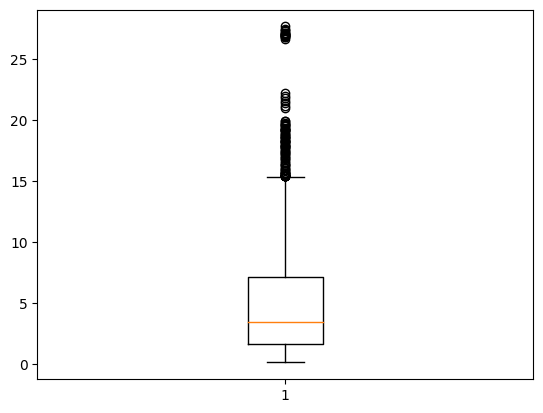

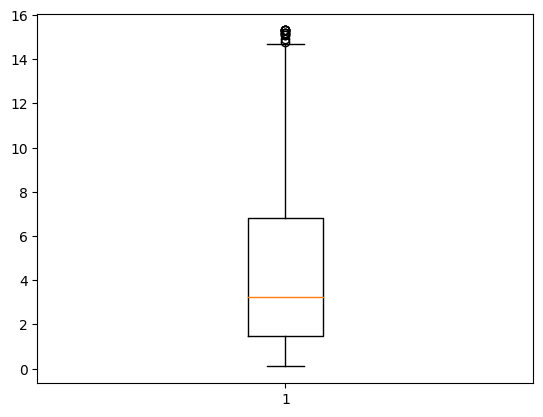

In [61]:
plt.boxplot(data[' thinness  1-19 years'])
plt.show()

q1, q3 = np.percentile(data[' thinness  1-19 years'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = data[' thinness  1-19 years'][(data[' thinness  1-19 years'] < lower_bound) | (data[' thinness  1-19 years'] > upper_bound)]

# remove outliers from the data
data1 = data[' thinness  1-19 years'][(data[' thinness  1-19 years'] >= lower_bound) & (data[' thinness  1-19 years'] <= upper_bound)]
data[' thinness  1-19 years']= data1
# plt.figure()
plt.boxplot(data1)
plt.show()

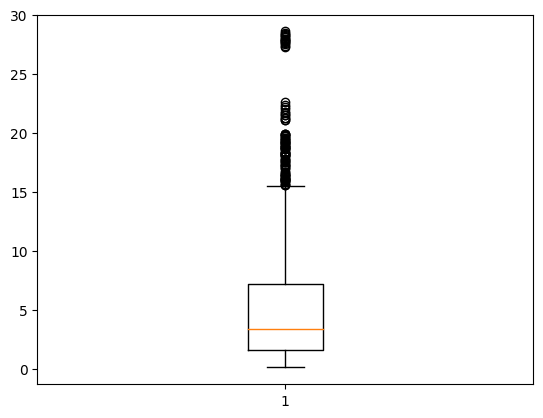

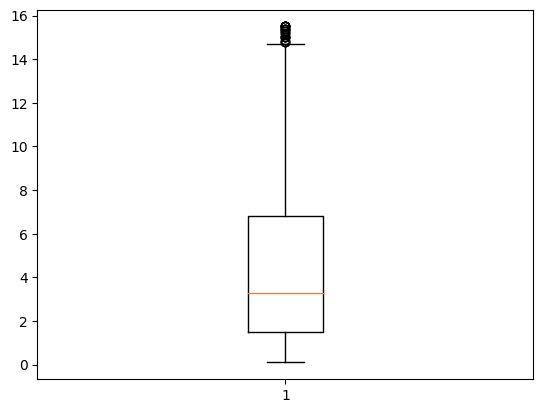

In [62]:
plt.boxplot(data[' thinness 5-9 years'])
plt.show()

q1, q3 = np.percentile(data[' thinness 5-9 years'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = data[' thinness 5-9 years'][(data[' thinness 5-9 years'] < lower_bound) | (data[' thinness 5-9 years'] > upper_bound)]

# remove outliers from the data
data1 = data[' thinness 5-9 years'][(data[' thinness 5-9 years'] >= lower_bound) & (data[' thinness 5-9 years'] <= upper_bound)]
data[' thinness 5-9 years']= data1
# plt.figure()
plt.boxplot(data1)
plt.show()

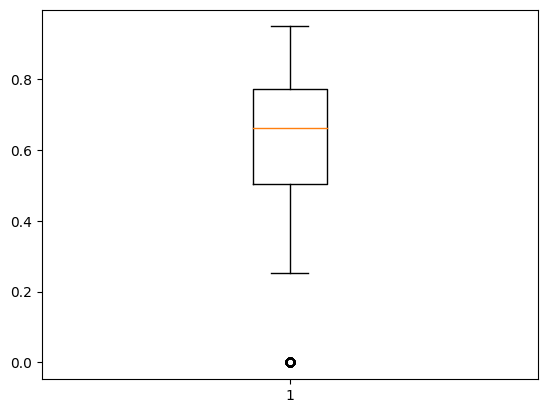

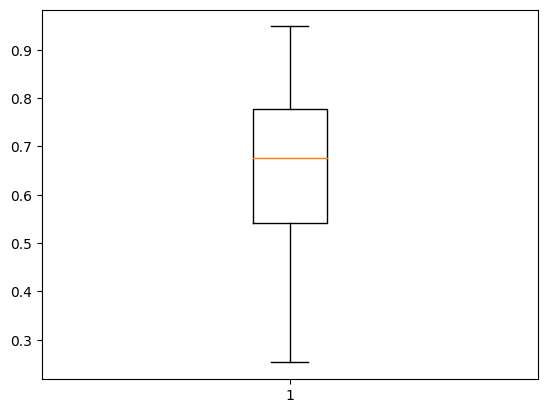

In [63]:
plt.boxplot(data['Income composition of resources'])
plt.show()

q1, q3 = np.percentile(data['Income composition of resources'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = data['Income composition of resources'][(data['Income composition of resources'] < lower_bound) | (data['Income composition of resources'] > upper_bound)]

# remove outliers from the data
data1 = data['Income composition of resources'][(data['Income composition of resources'] >= lower_bound) & (data['Income composition of resources'] <= upper_bound)]
data['Income composition of resources']= data1
# plt.figure()
plt.boxplot(data1)
plt.show()

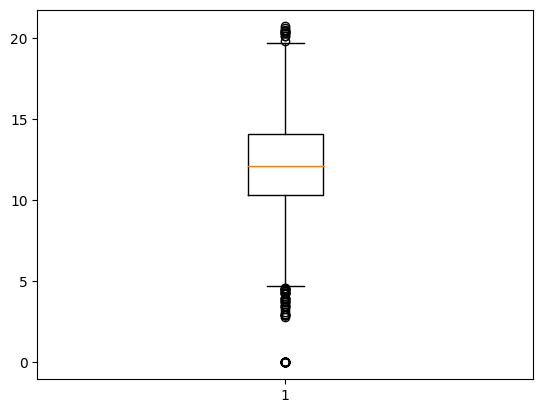

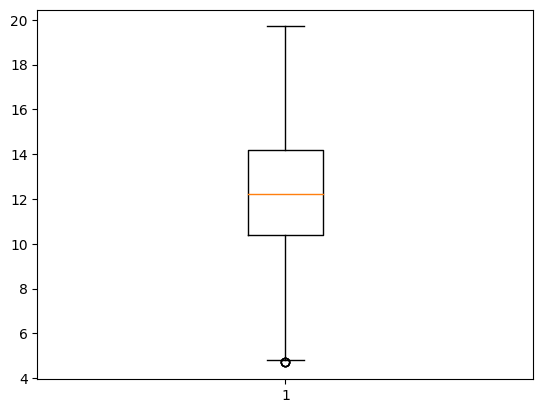

In [64]:
plt.boxplot(data['Schooling'])
plt.show()

q1, q3 = np.percentile(data['Schooling'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = data['Schooling'][(data['Schooling'] < lower_bound) | (data['Schooling'] > upper_bound)]

# remove outliers from the data
data1 = data['Schooling'][(data['Schooling'] >= lower_bound) & (data['Schooling'] <= upper_bound)]
data['Schooling']= data1
# plt.figure()
plt.boxplot(data1)
plt.show()

### Filling missing values with the mean of the columns

In [65]:
data[['Life expectancy ','Adult Mortality','Alcohol','percentage expenditure','Polio','Total expenditure','Diphtheria ',
     ' HIV/AIDS','GDP',' thinness  1-19 years',' thinness 5-9 years','Income composition of resources','Schooling']]= data[['Life expectancy ','Adult Mortality','Alcohol','percentage expenditure','Polio','Total expenditure','Diphtheria ',
     ' HIV/AIDS','GDP',' thinness  1-19 years',' thinness 5-9 years','Income composition of resources','Schooling']].transform(lambda x: x.fillna(x.mean()))

## Performing Exploratory Data Analysis on cleaned data

<AxesSubplot: title={'center': 'Average Life Expectancy'}, xlabel='Status', ylabel='Life Expectancy'>

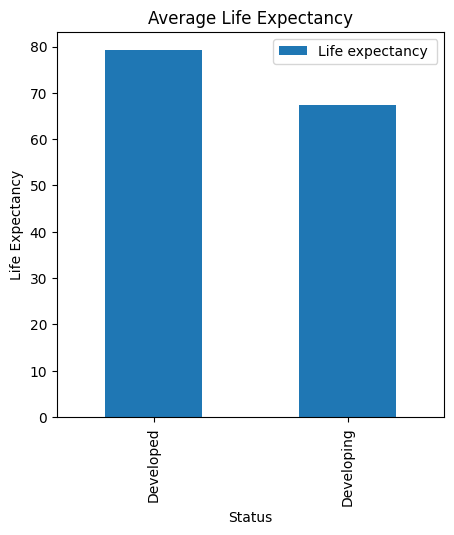

In [66]:
import plotly.express as plt
data_1 = data.groupby(['Status'])[['Life expectancy ']].mean()
data_1.plot(kind='bar', title='Average Life Expectancy', ylabel='Life Expectancy', xlabel='Status', figsize=(5, 5))

Average Life Expectancy for Developed Country is greater than Country which is still Developing

## Heat map for finding co-relation between columns and on targeted variable

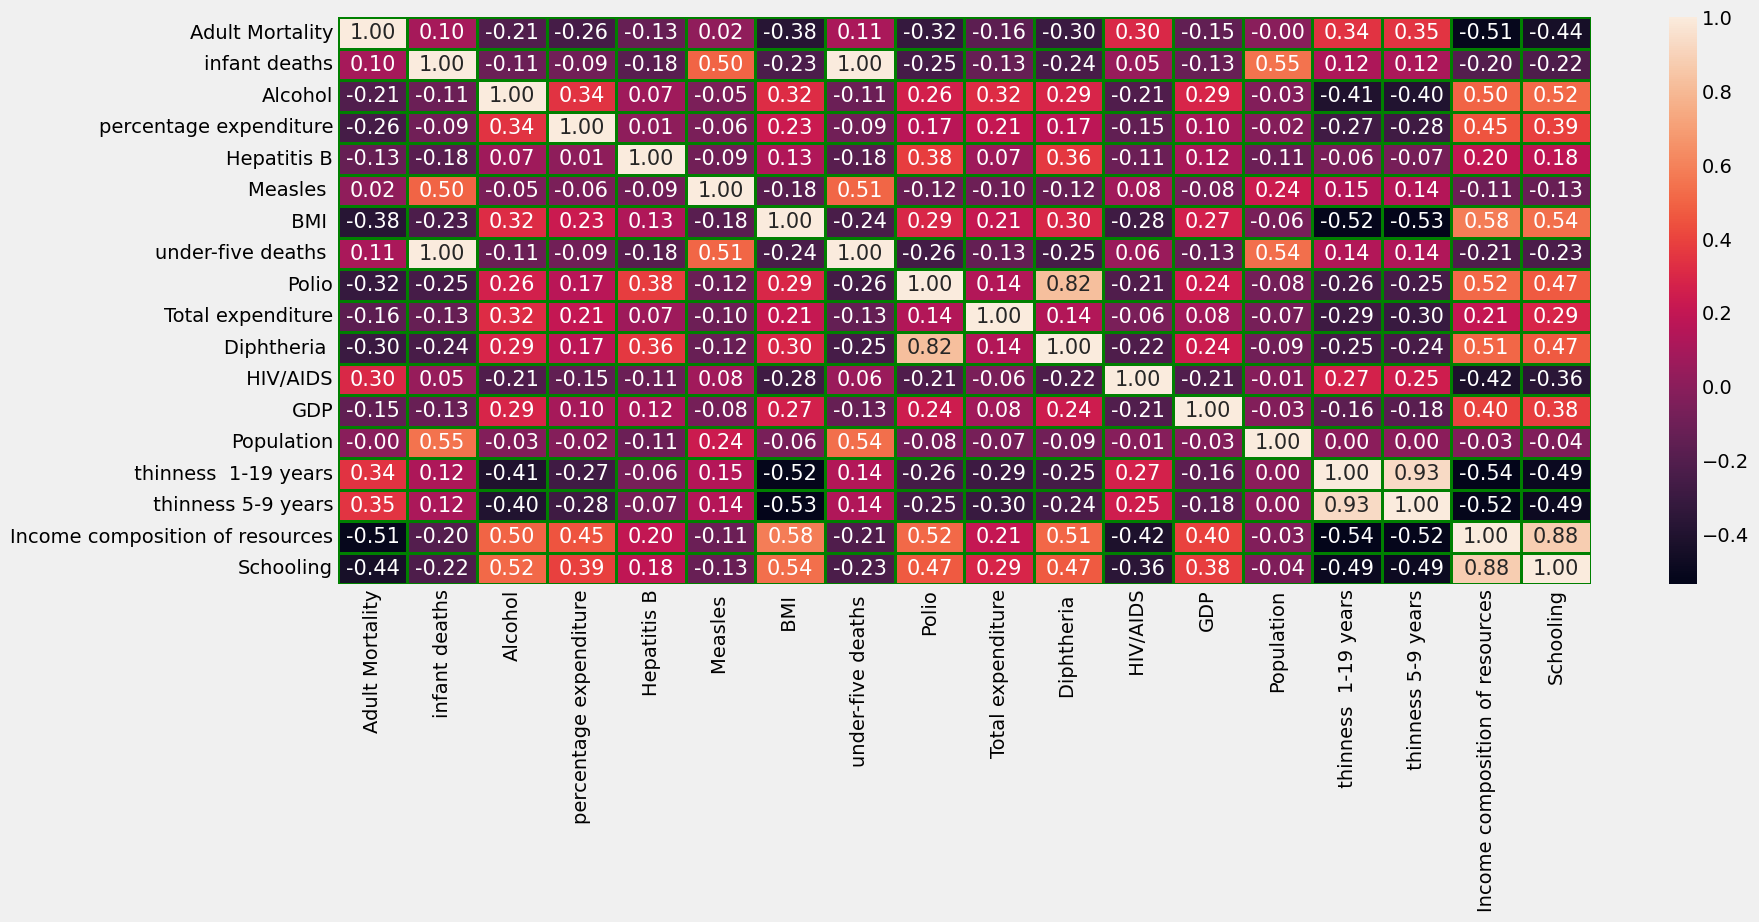

In [82]:
# heatmap of the data for checking the correlation between the numerical features and target column.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(figsize = (18, 7))
sns.heatmap(X.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'green')
plt.show()

The correlation matrix shows that the target has a high positive correlation with the features 'Schooling', 'Income composition of resources', and 'BMI', and a high negative correlation with the features 'Adult mortality' and 'HIV/AIDS'.
It is worth noting that the features 'Schooling' and 'Income composition of resources' also have a high correlation between them, as do 'Adult mortality' and 'HIV/AIDS'.

In [74]:
#selection of numerical and categorical colmuns
num_cols = data.select_dtypes(exclude = 'object')
cat_cols = data.select_dtypes(include = 'object')

In [75]:
num_cols.shape

(2938, 20)

# Scatter plot of each numerical variable with the target variable life expectency.


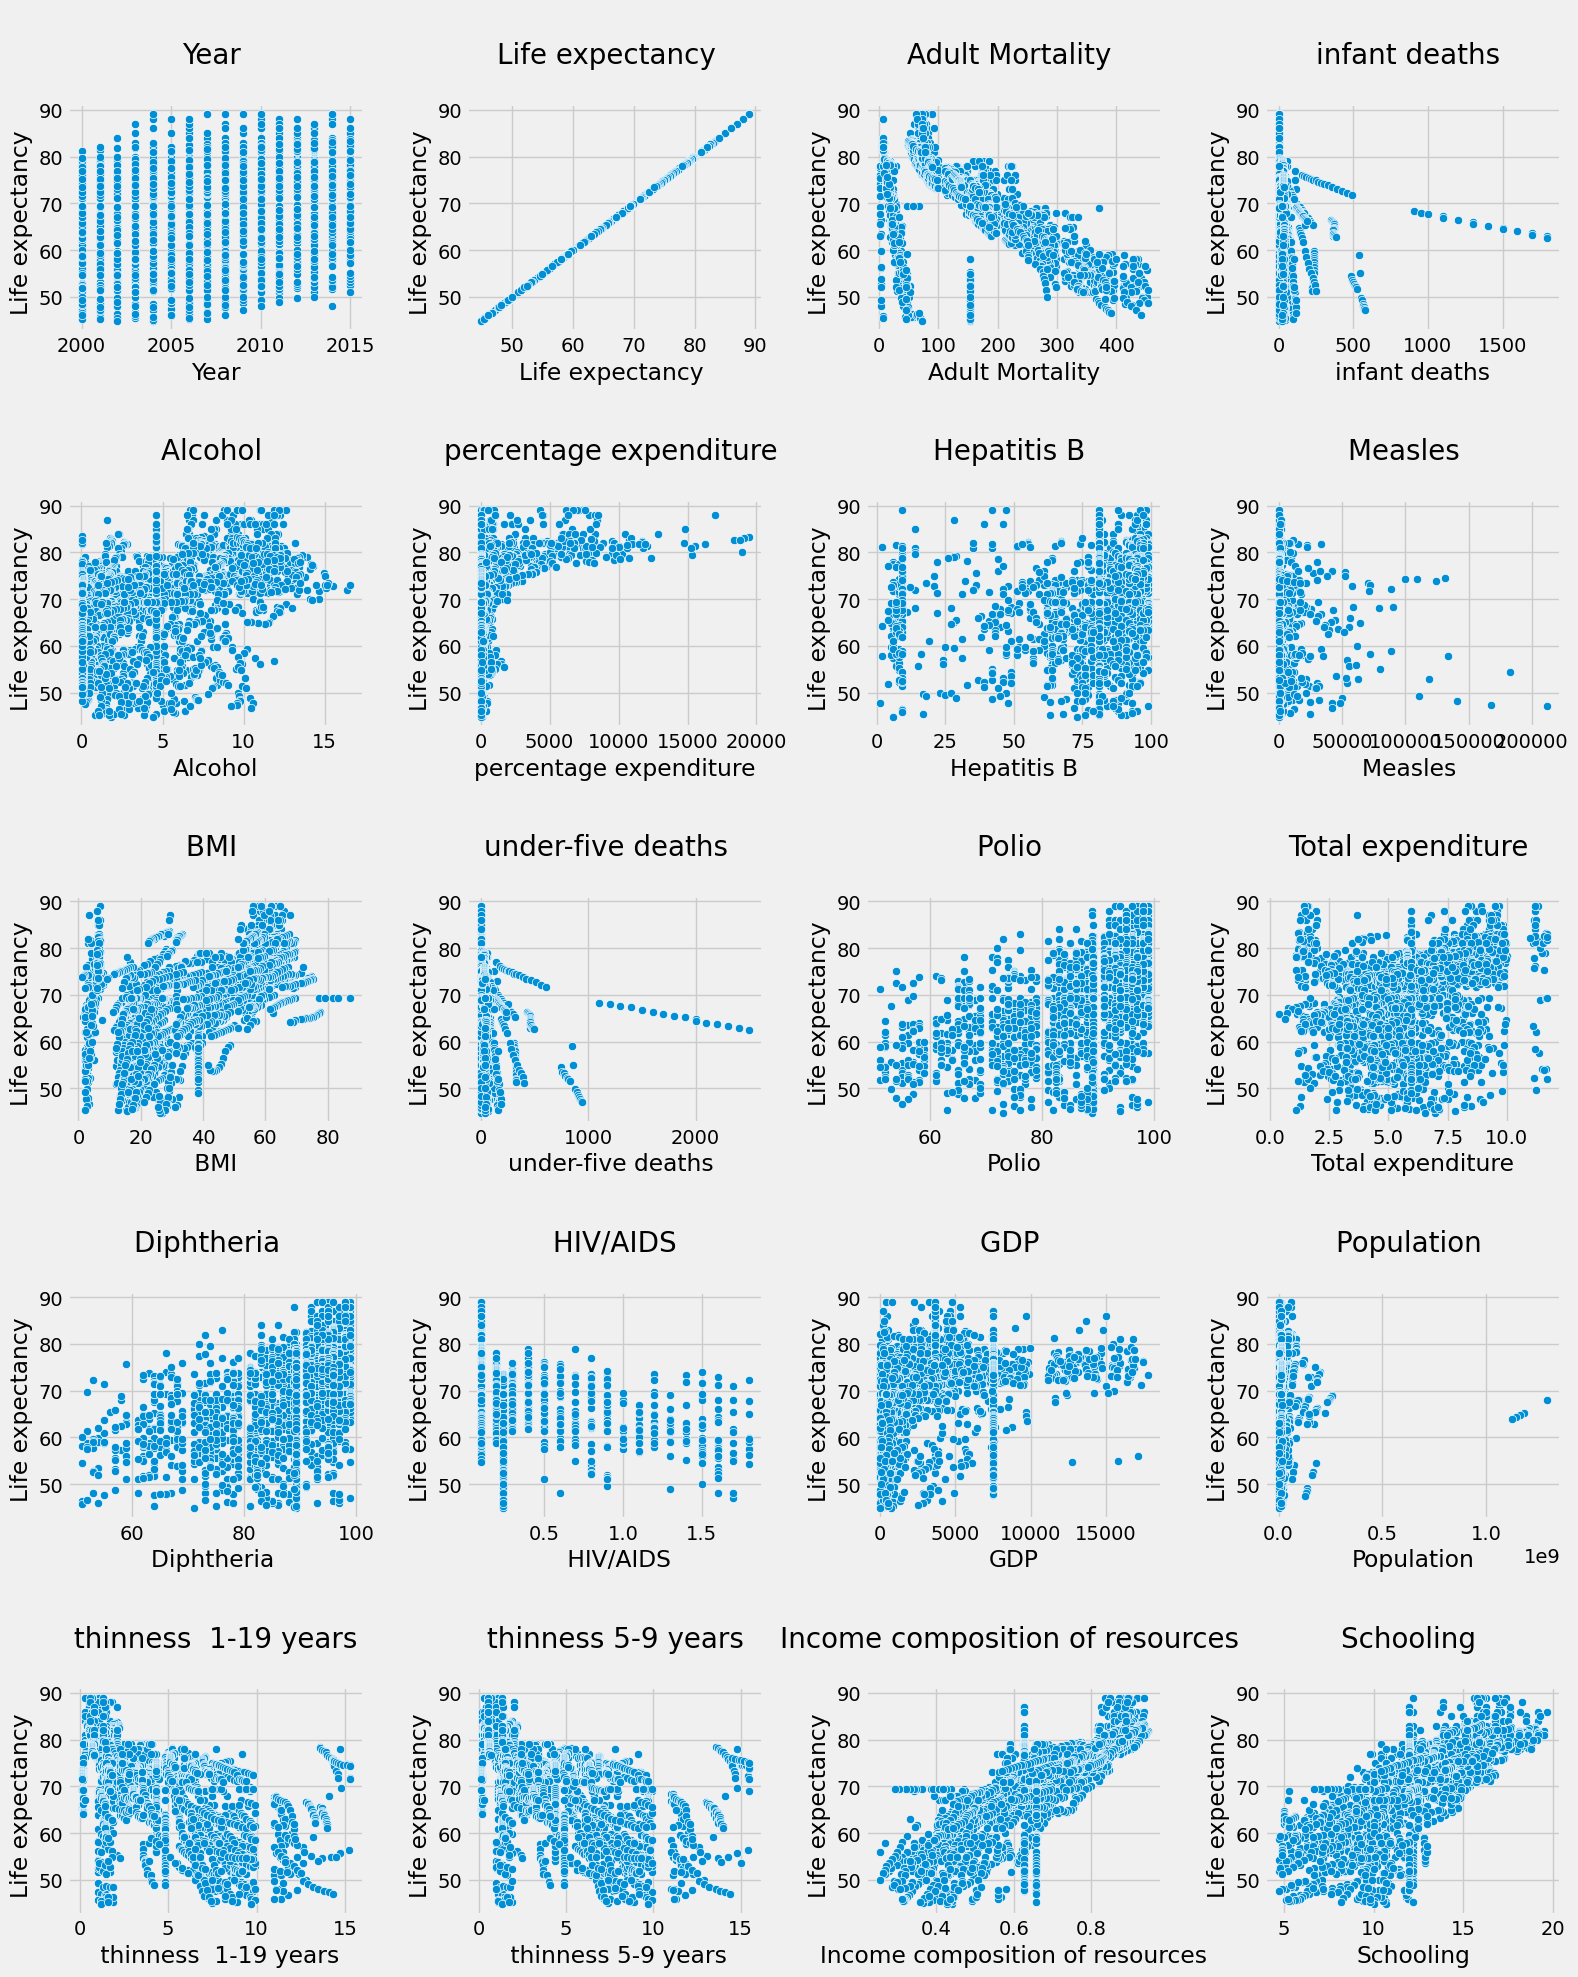

In [84]:
# Scatter plot of each numerical variable with the target variable price.

cols = num_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 20:
        ax = plt.subplot(5, 4, plotnumber)
        sns.scatterplot(x = cols[i], y = data['Life expectancy '], data = data,ax = ax, palette='rocket')
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()


It seems that the absolute number of a country's population does not have a direct relationship with life expectancy. Perhaps a more interesting variable would be population density, which can provide more clues about the country's social and geographical conditions.

Another interesting point is that countries with the highest alcohol consumption also have the highest life expectancies. However, this seems to be the classic case for using the maxim 'Correlation does not imply causation'. The life expectancy of someone who owns a Ferrari is possibly higher than that of the rest of the population, but that does not mean that buying a Ferrari will increase their life expectancy. The same applies to alcohol. One hypothesis is that in developed countries, the population's average has better financial conditions, allowing for greater consumption of luxury goods such as alcohol.

# Droping unwanted colmuns 

In [29]:
data=data.drop(['Country','Year','Status'],axis=1)

In [30]:
X=data.drop('Life expectancy ',axis=1)
y = data['Life expectancy ']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Adult Mortality                  2938 non-null   float64
 1   infant deaths                    2938 non-null   int64  
 2   Alcohol                          2938 non-null   float64
 3   percentage expenditure           2938 non-null   float64
 4   Hepatitis B                      2938 non-null   float64
 5   Measles                          2938 non-null   int64  
 6    BMI                             2938 non-null   float64
 7   under-five deaths                2938 non-null   int64  
 8   Polio                            2938 non-null   float64
 9   Total expenditure                2938 non-null   float64
 10  Diphtheria                       2938 non-null   float64
 11   HIV/AIDS                        2938 non-null   float64
 12  GDP                 

# Train-Test Spliting

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3  ,random_state= 42)

# Scaling  the data

In [32]:
## Scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scl=sc.fit_transform(X_train)
x_t_scl=sc.fit_transform(X_test) 
X_train=pd.DataFrame(x_scl,columns=X_train.columns)
X_test=pd.DataFrame(x_t_scl,columns=X_test.columns)

# Linear Regression

In [33]:
lrregressor = LinearRegression()
lrregressor.fit(X_train, y_train)
y_pred = lrregressor.predict(X_test)
lr_mse = sm.mean_squared_error(y_test, y_pred)
lr_rmse = math.sqrt(lr_mse)
lr_r2 = sm.r2_score(y_test, y_pred)
print("Root Mean squared error =", lr_mse)
print("R2 Score =", lr_r2)

Root Mean squared error = 21.14987924200955
R2 Score = 0.7596083936378767


In [34]:
#display adjusted R-squared for test data 
lr_AdjR=1 - (1-lrregressor.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
lr_AdjR

0.7545944319756308

# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeRegressor
dtregressor = DecisionTreeRegressor(random_state = 0)
dtregressor.fit(X_train, y_train)

y_pred = dtregressor.predict(X_test)

dt_mse = sm.mean_squared_error(y_test, y_pred)
dt_r2 = sm.r2_score(y_test, y_pred)
print("Mean squared error =", dt_mse)
print("R2 Score =", dt_r2)

Mean squared error = 15.075250440498795
R2 Score = 0.8286532216928875


In [36]:
#display adjusted R-squared for test data 
Dt_AdjR=1 - (1-dtregressor.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Dt_AdjR

0.8250793607316731

# Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfregressor.fit(X_train, y_train)

y_pred = rfregressor.predict(X_test)

rf_mse = sm.mean_squared_error(y_test, y_pred)
rf_r2 = sm.r2_score(y_test, y_pred)
print("Mean squared error =", rf_mse)
print("R2 Score =", rf_r2)

Mean squared error = 8.361474368451026
R2 Score = 0.9049626604488982


In [38]:
#display adjusted R-squared for test data 
Rf_AdjR=1 - (1-rfregressor.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Rf_AdjR

0.9029804216170096

# KNeighbors

In [39]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()
kn.fit(X_train, y_train)

y_pred = kn.predict(X_test)

kn_mse = sm.mean_squared_error(y_test, y_pred)
kn_r2 = sm.r2_score(y_test, y_pred)
print("Mean squared error =", kn_mse)
print("R2 Score =", kn_r2)

Mean squared error = 13.67207674551213
R2 Score = 0.844601831833078


In [40]:
#display adjusted R-squared for test data 
Kn_AdjR=1 - (1-kn.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Kn_AdjR

0.841360618592053

In [41]:
y_ax=['Linear Regression' ,'Decision Tree Regression', 'Random Forest Regression','K Neighbors Regression']
mse = [lr_mse, dt_mse, rf_mse, kn_mse]
r2 = [lr_r2, dt_r2, rf_r2,  kn_r2]
Adj_R2=[lr_AdjR,Dt_AdjR,Rf_AdjR,Kn_AdjR]


In [42]:
df = pd.DataFrame({'Algorithms': y_ax, 'MSE Values': mse, 'R2 Values':r2,'Adjusted R2':Adj_R2})
df

,Algorithms,MSE Values,R2 Values,Adjusted R2
0,Linear Regression,21.149879,0.759608,0.754594
1,Decision Tree Regression,15.075250,0.828653,0.825079
2,Random Forest Regression,8.361474,0.904963,0.902980
3,K Neighbors Regression,13.672077,0.844602,0.841361


# Conclusion

Random Forest is best model for the dataset.